# Assessing Quantity of Motion by stim segment per sensor
Comparing mobile sensor to motion capture measures of quantity of motion, given each stimulus condition

In [1]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d

import activityanalysis_test as act
import respy_test as respy

In [2]:
os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/Mobile_test/Data/')
filename = 'Trial recording - Trial Stimuli details.tsv'
stim_dets = pd.read_csv(filename,sep='\t')
filename = 'Trial_recordings.tsv'
rough_align = pd.read_csv(filename,sep='\t')
rough_align

,filename,Data type,Resp start,Mobile start,Stim,Trial stim,Participant,Trial order,Mobile loc,Music Move,Move Act,Resp_file,Mobile_file,mocap_file
0,DS_T1_redo.qtm,Mocap,4.25,7.5,12,T1,DS,1,6,Move Standing,Clapping,1615819583587,data_part1_trial_1_Stim_T1.csv,DS_T1_redoLabeled2.tsv
1,DS_T3.qtm,Mocap,4.00,8.0,18,T3,DS,2,6,Move Seated,lean forward and back,1615820096915,data_part1_trial_2_Stim_T3.csv,DS_T3.tsv
2,DS_T5.qtm,Mocap,4.00,7.0,10,T5,DS,3,6,Move Seated,Text,1615820773283,data_part1_trial_3_Stim_T5.csv,DS_T5.tsv
3,DS_T7.qtm,Mocap,4.00,11.0,15,T7,DS,4,6,Move Seated,Stand stretch,1615821302122,data_part1_trial_4_Stim_T7.csv,DS_T7.tsv
4,DS_T2.qtm,Mocap,3.50,7.0,9,T2,DS,5,12,Move Standing,lean forward and back,1615822101240,data_part1_trial_5_Stim_T2.csv,DS_T2.tsv
5,DS_T4.qtm,Mocap,4.00,7.0,12,T4,DS,6,12,Move Standing,Remove phone,1615822538057,data_part1_trial_6_Stim_T4.csv,DS_T4.tsv
6,DS_T6.qtm,Mocap,3.00,6.0,8,T6,DS,7,12,Move Standing,Text,1615822953135,data_part1_trial_7_Stim_T6.csv,DS_T6.tsv
7,DS_T8.qtm,Mocap,2.50,4.5,8,T8,DS,8,12,Move Standing,Stand stretch,1615823440498,data_part1_trial_8_Stim_T8.csv,DS_T8.tsv
8,KB_Trial_01.qtm,Mocap,5.00,10.0,23,T1,KB,9,6,Move Standing,Clapping,1615898127612,data_part2_trial_1_Stim_T1.csv,KB_Trial_01.tsv
9,KB_Trial_02.qtm,Mocap,6.00,12.0,17,T2,KB,10,6,Move Standing,lean forward and back,1615898764122,data_part2_trial_2_Stim_T2.csv,KB_Trial_02.tsv


In [3]:
stim_dets

,Time (s),Element,Time (m:s),T1,T2,T3,T4,T5,T6,T7,T8
0,0.000,Trial number,0:00.000,1,2,3,4,5,6,7,8
1,2.136,Part 1 Synchronisation,0:02.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20.000,taps,0:20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.450,Part 2 Listening task 1,0:23.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32.000,Silence 1,0:32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,62.000,Music 1,1:02.00,Danish quartet ex 1,Hildur Guðnadóttir/Saman/11 Torrek,Coltrane/My Favorite things/03 Summertime,Olafur Arnalds/13 Say My Name (feat. Arnór Dan),Schola Magdalena/O Gracious Light/15 Allelulia,Ben Heppner/My Secret Heart/Roses of Picardy,The Dufay Collective/Miri it is/01 Miri it is ...,Cowboy Bebop OST 3 - BLUE/14 Wo Qui Non Coin
6,92.500,Part 3: Moving tasks,1:32.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,101.000,Verbalise,1.41.00,Pets,Breakfast,music,socks,play instrument,weather,books,Horses
8,112.000,Move,1:52.0,Clapping,lean forward and back,lean forward and back,Remove phone,Text,Text,Stand stretch,Stand stretch
9,121.000,move to music,2:01.00,Standing,Standing,Seated,Standing,Seated,Standing,Seated,Standing


In [4]:
# conditions for comparison
units = 1000 # ms
fs = 10/units # 10 Hz

cutoff = np.array([0.05,1])/units # filtering to between 1 and 0.05 hz
nyq = 0.5 * fs 
order = 2 
normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='bandpass', analog=False)

In [5]:
trialno = 0
rough_align.loc[1,'Mobile_file']

'data_part1_trial_2_Stim_T3.csv'

## gather data per trial

In [23]:
# trial timing information 
    # ran through trials manually, so might have mistakes with which files are matched
#trialno = 15 # 12
part_code = rough_align.loc[trialno,'Participant']
Trial_stim = rough_align.loc[trialno,'Trial stim']
Mob_Loc = rough_align.loc[trialno,'Mobile loc']
Move_Act = rough_align.loc[trialno,'Move Act']
Dance_Con = rough_align.loc[trialno,'Music Move']
Trial_Ord = rough_align.loc[trialno,'Trial order']

# Trial to test
trial_name = "KB_Trial_08"#"KB_Trial_04"#"KB_Trial_03"#"KB_Trial_02"#"DS_T2"#"DS_T1"

# mobile app data
os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/Mobile_test/Data/Acc/')
filename = 'data_part2_trial_8_Stim_T8.csv'
mob = pd.read_csv(filename)

# respiration belt data
os.chdir('/Users/finn/Documents/uio-ritmo/Sweetzpot Data/1615902190449/')
filename = 'Breathing.txt'
g = pd.read_csv(filename,' ',header=None)

# motion capture recordings
os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/Mobile_test/Data/MC/')
filename = 'KB_Trial_08.tsv'
mocap = pd.read_csv(filename, sep='\t',skiprows=10)

df_sTev = pd.DataFrame()

df_sTev['Element'] = stim_dets['Element']
df_sTev['qTs'] = stim_dets['Time (s)'] + rough_align['Stim'].loc[trialno]
df_sTev['qTe'] = stim_dets['Time (s)'].shift(-1,fill_value=0) + rough_align['Stim'].loc[12]
df_sTev['mTs'] = stim_dets['Time (s)'] + rough_align['Stim'].loc[trialno]-rough_align['Mobile start'].loc[trialno]
df_sTev['mTe'] = stim_dets['Time (s)'].shift(-1,fill_value=0) + rough_align['Stim'].loc[trialno]-rough_align['Mobile start'].loc[trialno]
df_sTev['rTs'] = stim_dets['Time (s)'] + rough_align['Stim'].loc[trialno]-rough_align['Resp start'].loc[trialno]
df_sTev['rTe'] = stim_dets['Time (s)'].shift(-1,fill_value=0) + rough_align['Stim'].loc[trialno]-rough_align['Resp start'].loc[trialno]
df_sTev

,Element,qTs,qTe,mTs,mTe,rTs,rTe
0,Trial number,12.000,15.136,4.500,6.636,7.750,9.886
1,Part 1 Synchronisation,14.136,33.000,6.636,24.500,9.886,27.750
2,taps,32.000,36.450,24.500,27.950,27.750,31.200
3,Part 2 Listening task 1,35.450,45.000,27.950,36.500,31.200,39.750
4,Silence 1,44.000,75.000,36.500,66.500,39.750,69.750
5,Music 1,74.000,105.500,66.500,97.000,69.750,100.250
6,Part 3: Moving tasks,104.500,114.000,97.000,105.500,100.250,108.750
7,Verbalise,113.000,125.000,105.500,116.500,108.750,119.750
8,Move,124.000,134.000,116.500,125.500,119.750,128.750
9,move to music,133.000,139.000,125.500,130.500,128.750,133.750


In [24]:
mob['Time'] = (mob['time']-mob['time'].loc[0]) # Time is time zero
df = mob
cols = ['x', 'y', 'z']

time_new = np.arange(df['Time'].iat[0],df['Time'].iat[-1],1/fs)
df_rs = pd.DataFrame()
df_rs['Time'] = time_new
df_rs = df_rs.set_index('Time')
df_rs['Time (s)'] = time_new/1000

for c in cols:
#    if not c.startswith('time') and not c.startswith('Time') :
    f = interpolate.interp1d(df.Time, df[c].values,fill_value='extrapolate')
    df_rs[c] = f(time_new)
mob_rs = df_rs.copy()#.round(4)

resp = pd.DataFrame()
resp['belt'] = g.loc[g[8]== True,2]
resp['Time'] = (g.loc[g[8]== True,7]-g.iloc[0,7])

df = resp
cols = ['belt']

time_new = np.arange(df['Time'].iat[0],df['Time'].iat[-1],1/fs)
df_rs = pd.DataFrame()
df_rs['Time'] = time_new
df_rs = df_rs.set_index('Time')
df_rs['Time (s)'] = time_new/1000

for c in cols:
#    if not c.startswith('time') and not c.startswith('Time') :
    f = interpolate.interp1d(df.Time, df[c].values,fill_value='extrapolate')
    df_rs[c] = f(time_new)

resp_rs = df_rs.copy()

mocap.Time = mocap.Time*1000
df = mocap
cols = ['HEADT X', 'HEADT Y', 'HEADT Z', 'SHL X', 'SHL Y','SHL Z','SHR X', 'SHR Y', 'SHR Z','CH X', 'CH Y', 'CH Z']

time_new = np.arange(df['Time'].iat[0],df['Time'].iat[-1],1/fs)
df_rs = pd.DataFrame()
df_rs['Time'] = time_new
df_rs = df_rs.set_index('Time')
df_rs['Time (s)'] = time_new/1000

for c in cols:
#    if not c.startswith('time') and not c.startswith('Time') :
    f = interpolate.interp1d(df.Time, df[c].values,fill_value='extrapolate')
    df_rs[c] = f(time_new)

mocap_rs = df_rs.copy()

,x,y,z
Time,,,
0.0,7.671770,-0.116867,-6.189161
100.0,7.630126,-0.077988,-6.815905
200.0,7.389615,-0.017728,-6.069143
300.0,7.435080,-0.017330,-6.397653
400.0,7.251992,-0.030790,-6.058722
...,...,...,...
274300.0,8.065391,-0.128688,-5.526304
274400.0,8.002731,-0.097601,-5.653497
274500.0,8.048782,-0.010774,-5.700931


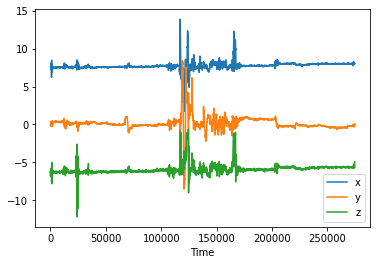

In [25]:
A = mob_rs.loc[:,['x','y','z']].copy()
# A.loc[:,'x'] = A.loc[:,'x'] -A['x'].mean()
# # A.loc[:,'x'] = A['x'].round(5)
# #A = A.round(4)
# A.loc[:,'y'] = A.loc[:,'y'] -A['y'].mean()
# A.loc[:,'z'] = A.loc[:,'z'] -A['z'].mean()
A.plot()
A

In [26]:
# pull out the signal segment corresponding to each element
time_cues = ['qTs','qTe']
df_QoM_seg = pd.DataFrame()
df_QoM_seg['Element'] = df_sTev['Element']
for marker in ["HEADT","SHL","SHR","CH"]:
    df_QoM_seg[marker] = 0
    for i in range(len(df_QoM_seg)-1):
        seg = mocap_rs.loc[df_sTev.loc[i,time_cues[0]]*1000:df_sTev.loc[i,time_cues[1]]*1000,[marker +' X',marker +' Y',marker +' Z']]
        a = (seg[marker + ' X'].diff()**2 +  seg[marker + ' Y'].diff()**2 +  seg[marker +' Z'].diff()**2)**0.5
        dur = df_sTev.loc[i,time_cues[1]]-df_sTev.loc[i,time_cues[0]]
        df_QoM_seg.loc[i,marker] = a.sum()/dur 
    # get the average per marker
    i = 17
    seg = mocap_rs.loc[df_sTev.loc[i,time_cues[1]]*1000:df_sTev.loc[i,time_cues[0]]*1000,[marker +' X',marker +' Y',marker +' Z']]
    a = (seg[marker + ' X'].diff()**2 +  seg[marker + ' Y'].diff()**2 +  seg[marker +' Z'].diff()**2)**0.5
    dur = df_sTev.loc[i,time_cues[0]]-df_sTev.loc[i,time_cues[1]]
    df_QoM_seg.loc[i,marker] = a.sum()/dur  
    # normalise
#    df_QoM_seg[marker]=df_QoM_seg[marker]/df_QoM_seg[marker].loc[i]

time_cues = ['mTs','mTe']
marker = 'Mobile'
df_QoM_seg[marker] = 0
for i in range(len(df_QoM_seg)-1):
    seg = mob_rs.loc[df_sTev.loc[i,time_cues[0]]*1000:df_sTev.loc[i,time_cues[1]]*1000,['x','y','z']]
    a = (seg['x'].diff()**2 +  seg['y'].diff()**2 +  seg['z'].diff()**2)**0.5
    dur = df_sTev.loc[i,time_cues[1]]-df_sTev.loc[i,time_cues[0]]
    df_QoM_seg.loc[i,marker] = a.sum()/dur 
# get the average per marker
i = 17
seg = mob_rs.loc[df_sTev.loc[i,time_cues[1]]*1000:df_sTev.loc[i,time_cues[0]]*1000,['x','y','z']]
a = (seg['x'].diff()**2 +  seg['y'].diff()**2 +  seg['z'].diff()**2)**0.5
dur = df_sTev.loc[i,time_cues[0]]-df_sTev.loc[i,time_cues[1]]
df_QoM_seg.loc[i,marker] = a.sum()/dur 
# normalise
#df_QoM_seg[marker]=df_QoM_seg[marker]/df_QoM_seg[marker].loc[i]

time_cues = ['rTs','rTe']
marker = 'Resp'
df_QoM_seg[marker] = 0
for i in range(len(df_QoM_seg)-1):
    seg = resp_rs.loc[df_sTev.loc[i,time_cues[0]]*1000:df_sTev.loc[i,time_cues[1]]*1000,'belt']
    a = seg.diff().abs()
    dur = df_sTev.loc[i,time_cues[1]]-df_sTev.loc[i,time_cues[0]]
    df_QoM_seg.loc[i,marker] = a.sum()/dur 
# get the average per marker
i = 17
seg = resp_rs.loc[df_sTev.loc[i,time_cues[1]]*1000:df_sTev.loc[i,time_cues[0]]*1000,'belt']
a = seg.diff().abs()
dur = df_sTev.loc[i,time_cues[0]]-df_sTev.loc[i,time_cues[1]]
df_QoM_seg.loc[i,marker] = a.sum()/dur    
# normalise
#df_QoM_seg[marker]=df_QoM_seg[marker]/df_QoM_seg[marker].loc[i]

df_QoM_seg.loc[i,'Element'] = 'Trial Average'
df_QoM_seg

,Element,HEADT,SHL,SHR,CH,Mobile,Resp
0,Trial number,5.525783,4.671711,4.692003,4.787398,1.544218,99.028732
1,Part 1 Synchronisation,35.721690,11.969737,12.687084,10.292134,4.271077,78.909031
2,taps,24.441160,7.269047,7.212260,6.446156,7.644025,104.353247
3,Part 2 Listening task 1,28.856135,13.650547,11.534016,11.768210,2.541831,59.409733
4,Silence 1,14.392831,4.903221,4.735913,4.727230,1.138768,84.243466
5,Music 1,25.461025,5.760455,5.840333,5.657993,1.404866,84.704150
6,Part 3: Moving tasks,23.443988,12.170335,9.511385,8.965672,1.423736,61.270742
7,Verbalise,119.929959,106.449863,103.488776,88.265694,5.069415,142.332759
8,Move,464.463590,329.676082,295.700979,628.728293,18.462490,152.163354
9,move to music,159.039765,59.260542,70.493088,48.565097,9.672460,91.125866


,HEADT,SHL,SHR,CH,Mobile,Resp
HEADT,1.000000,0.938080,0.958720,0.948400,0.820433,0.155831
SHL,0.938080,1.000000,0.989680,0.989680,0.801858,0.139319
SHR,0.958720,0.989680,1.000000,0.987616,0.828689,0.151703
CH,0.948400,0.989680,0.987616,1.000000,0.826625,0.197110
Mobile,0.820433,0.801858,0.828689,0.826625,1.000000,0.296182
Resp,0.155831,0.139319,0.151703,0.197110,0.296182,1.000000


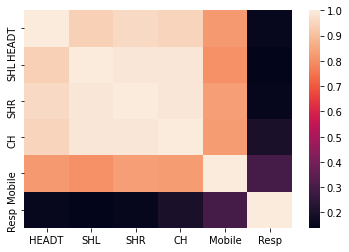

In [27]:
cs = df_QoM_seg.columns
data2 = df_QoM_seg[cs[1:]]
corr = data2.corr(method="spearman")
sns.heatmap(corr)
corr

,HEADT,SHL,SHR,CH,Mobile,Resp
HEADT,1.000000,0.938080,0.958720,0.948400,0.820433,0.155831
SHL,0.938080,1.000000,0.989680,0.989680,0.801858,0.139319
SHR,0.958720,0.989680,1.000000,0.987616,0.828689,0.151703
CH,0.948400,0.989680,0.987616,1.000000,0.826625,0.197110
Mobile,0.820433,0.801858,0.828689,0.826625,1.000000,0.296182
Resp,0.155831,0.139319,0.151703,0.197110,0.296182,1.000000


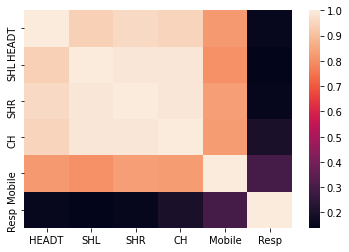

In [22]:
cs = df_QoM_seg.columns
data2 = df_QoM_seg[cs[1:]]
corr = data2.corr(method="spearman")
sns.heatmap(corr)
corr

In [28]:
df_QoM_all = pd.DataFrame()
df_corrs_QoM = pd.DataFrame()

In [29]:
df_QoM_seg['Participant'] = rough_align.loc[trialno,'Participant']
df_QoM_seg['Trial stim'] = rough_align.loc[trialno,'Trial stim']
df_QoM_seg['Mobile Loc'] = rough_align.loc[trialno,'Mobile loc']
df_QoM_seg['Move Act'] = rough_align.loc[trialno,'Move Act']
df_QoM_seg['Music Move'] = rough_align.loc[trialno,'Music Move']
df_QoM_seg['Trial order'] = rough_align.loc[trialno,'Trial order']
df_QoM_seg['Trial Name'] = trial_name

corr['Participant'] = rough_align.loc[trialno,'Participant']
corr['Trial stim'] = rough_align.loc[trialno,'Trial stim']
corr['Mobile Loc'] = rough_align.loc[trialno,'Mobile loc']
corr['Move Act'] = rough_align.loc[trialno,'Move Act']
corr['Music Move'] = rough_align.loc[trialno,'Music Move']
corr['Trial order'] = rough_align.loc[trialno,'Trial order']
corr['Trial Name'] = trial_name
corr['corrx'] = corr.index

# add segments to df_QoM_all
df_QoM_all = df_QoM_all.append(df_QoM_seg, ignore_index=True)
df_corrs_QoM = df_corrs_QoM.append(corr, ignore_index=True)
df_corrs_QoM

,HEADT,SHL,SHR,CH,Mobile,Resp,Participant,Trial stim,Mobile Loc,Move Act,Music Move,Trial order,Trial Name,corrx
0,1.000000,0.938080,0.958720,0.948400,0.820433,0.155831,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08,HEADT
1,0.938080,1.000000,0.989680,0.989680,0.801858,0.139319,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08,SHL
2,0.958720,0.989680,1.000000,0.987616,0.828689,0.151703,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08,SHR
3,0.948400,0.989680,0.987616,1.000000,0.826625,0.197110,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08,CH
4,0.820433,0.801858,0.828689,0.826625,1.000000,0.296182,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08,Mobile
5,0.155831,0.139319,0.151703,0.197110,0.296182,1.000000,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08,Resp


In [30]:
df_corrs_QoM
df_QoM_all


,Element,HEADT,SHL,SHR,CH,Mobile,Resp,Participant,Trial stim,Mobile Loc,Move Act,Music Move,Trial order,Trial Name
0,Trial number,5.525783,4.671711,4.692003,4.787398,1.544218,99.028732,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08
1,Part 1 Synchronisation,35.721690,11.969737,12.687084,10.292134,4.271077,78.909031,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08
2,taps,24.441160,7.269047,7.212260,6.446156,7.644025,104.353247,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08
3,Part 2 Listening task 1,28.856135,13.650547,11.534016,11.768210,2.541831,59.409733,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08
4,Silence 1,14.392831,4.903221,4.735913,4.727230,1.138768,84.243466,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08
5,Music 1,25.461025,5.760455,5.840333,5.657993,1.404866,84.704150,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08
6,Part 3: Moving tasks,23.443988,12.170335,9.511385,8.965672,1.423736,61.270742,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08
7,Verbalise,119.929959,106.449863,103.488776,88.265694,5.069415,142.332759,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08
8,Move,464.463590,329.676082,295.700979,628.728293,18.462490,152.163354,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08
9,move to music,159.039765,59.260542,70.493088,48.565097,9.672460,91.125866,DS,T1,6,Clapping,Move Standing,1,KB_Trial_08


In [14]:
import pickle as pi

In [15]:
some_files = {"df_corrs_QoM": df_corrs_QoM, "df_QoM_all": df_QoM_all, "rough_align": rough_align,"stim_dets":stim_dets}
os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/Mobile_test/Data/')

pi.dump(some_files, open( "some_trials_qom.p", "wb" ) )

# Run through all trials

In [54]:
df_QoM_all = pd.DataFrame()
df_corrs_QoM = pd.DataFrame()

# Run through trials 
for trialno in range(len(rough_align)):
  # trial timing information 
    part_code = rough_align.loc[trialno,'Participant']
    Trial_stim = rough_align.loc[trialno,'Trial stim']
    Mob_Loc = rough_align.loc[trialno,'Mobile loc']
    Move_Act = rough_align.loc[trialno,'Move Act']
    Dance_Con = rough_align.loc[trialno,'Music Move']
    Trial_Ord = rough_align.loc[trialno,'Trial order']

    # Trial to test
    trial_name = part_code + "_" + Trial_stim # "KB_Trial_08"#"KB_Trial_04"#"KB_Trial_03"#"KB_Trial_02"#"DS_T2"#"DS_T1"
    # mobile app data
    os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/Mobile_test/Data/Acc/')
    mob = pd.read_csv(rough_align.loc[trialno,'Mobile_file'])
    for c in ['x','y','z']:
        mob.loc[:,c]=mob[c].round(1)
    
    # respiration belt data
    os.chdir('/Users/finn/Documents/uio-ritmo/Sweetzpot Data/' + str(rough_align.loc[trialno,'Resp_file']) + '/')
    g = pd.read_csv('Breathing.txt',' ',header=None)
    # motion capture recordings
    os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/Mobile_test/Data/MC/')
    if rough_align.loc[trialno,'mocap_file'] in ['KB_Trial_01.tsv','DS_T8.tsv','DS_T6.tsv','DS_T7.tsv','DS_T5.tsv','DS_T4.tsv', 'DS_T3.tsv']:
        mocap = pd.read_csv(rough_align.loc[trialno,'mocap_file'], sep='\t',skiprows=11,header=None)
        #"MARKER_NAMES	HEADT	SHL	MOBTL	SHR	HANDR	MOBBR	MOBBL	MOBTR	CH	HANDL"
        mocap.columns = ['HEADT X','HEADT Y','HEADT Z','SHL X','SHL Y','SHL Z','MOBTL X','MOBTL Y','MOBTL Z','SHR X','SHR Y','SHR Z','HANDR X','HANDR Y','HANDR Z','MOBBR X','MOBBR Y','MOBBR Z','MOBBL X','MOBBL Y','MOBBL Z','MOBTR X','MOBTR Y','MOBTR Z','CH X','CH Y','CH Z','HANDL X','HANDL Y','HANDL Z']
        mocap['Time'] = np.arange(0,len(mocap))/120
    else:
        mocap = pd.read_csv(rough_align.loc[trialno,'mocap_file'], sep='\t',skiprows=10)
        mocap.Time = mocap.Time

    df_sTev = pd.DataFrame()
    df_sTev['Element'] = stim_dets['Element']
    df_sTev['qTs'] = stim_dets['Time (s)'] + rough_align['Stim'].loc[trialno]
    df_sTev['qTe'] = stim_dets['Time (s)'].shift(-1,fill_value=0) + rough_align['Stim'].loc[12]
    df_sTev['mTs'] = stim_dets['Time (s)'] + rough_align['Stim'].loc[trialno]-rough_align['Mobile start'].loc[trialno]
    df_sTev['mTe'] = stim_dets['Time (s)'].shift(-1,fill_value=0) + rough_align['Stim'].loc[trialno]-rough_align['Mobile start'].loc[trialno]
    df_sTev['rTs'] = stim_dets['Time (s)'] + rough_align['Stim'].loc[trialno]-rough_align['Resp start'].loc[trialno]
    df_sTev['rTe'] = stim_dets['Time (s)'].shift(-1,fill_value=0) + rough_align['Stim'].loc[trialno]-rough_align['Resp start'].loc[trialno]
    
    # pull the relevant fiends and resample
    mob['Time'] = (mob['time']-mob['time'].loc[0]) # Time is time zero
    df = mob
    cols = ['x', 'y', 'z']
    time_new = np.arange(df['Time'].iat[0],df['Time'].iat[-1],1/fs)
    df_rs = pd.DataFrame()
    df_rs['Time'] = time_new
    df_rs = df_rs.set_index('Time')
    df_rs['Time (s)'] = time_new/1000
    for c in cols:
        f = interpolate.interp1d(df.Time, df[c].values,fill_value='extrapolate')
        df_rs[c] = f(time_new)
    mob_rs = df_rs.copy()

    resp = pd.DataFrame()
    resp['belt'] = g.loc[g[8]== True,2]
    resp['Time'] = (g.loc[g[8]== True,7]-g.iloc[0,7])
    df = resp
    cols = ['belt']
    time_new = np.arange(df['Time'].iat[0],df['Time'].iat[-1],1/fs)
    df_rs = pd.DataFrame()
    df_rs['Time'] = time_new
    df_rs = df_rs.set_index('Time')
    df_rs['Time (s)'] = time_new/1000

    for c in cols:
        f = interpolate.interp1d(df.Time, df[c].values,fill_value='extrapolate')
        df_rs[c] = f(time_new)
    resp_rs = df_rs.copy()

    mocap.Time = mocap.Time*1000
    df = mocap
    cols = ['HEADT X', 'HEADT Y', 'HEADT Z', 'SHL X', 'SHL Y','SHL Z','SHR X', 'SHR Y', 'SHR Z','CH X', 'CH Y', 'CH Z']
    time_new = np.arange(df['Time'].iat[0],df['Time'].iat[-1],1/fs)
    df_rs = pd.DataFrame()
    df_rs['Time'] = time_new
    df_rs = df_rs.set_index('Time')
    df_rs['Time (s)'] = time_new/1000
    for c in cols:
        f = interpolate.interp1d(df.Time, df[c].values,fill_value='extrapolate')
        df_rs[c] = f(time_new)
    mocap_rs = df_rs.copy()
    
    # evalute all signals per interval
    # pull out the signal segment corresponding to each element
    time_cues = ['qTs','qTe']
    df_QoM_seg = pd.DataFrame()
    df_QoM_seg['Element'] = df_sTev['Element']
    for marker in ["HEADT","SHL","SHR","CH"]:
        df_QoM_seg[marker] = 0
        for i in range(len(df_QoM_seg)-1):
            seg = mocap_rs.loc[df_sTev.loc[i,time_cues[0]]*1000:df_sTev.loc[i,time_cues[1]]*1000,[marker +' X',marker +' Y',marker +' Z']]
            a = (seg[marker + ' X'].diff()**2 +  seg[marker + ' Y'].diff()**2 +  seg[marker +' Z'].diff()**2)**0.5
            dur = df_sTev.loc[i,time_cues[1]]-df_sTev.loc[i,time_cues[0]]
            df_QoM_seg.loc[i,marker] = a.sum()/dur 
        i = 17 # get the average per marker
        seg = mocap_rs.loc[df_sTev.loc[i,time_cues[1]]*1000:df_sTev.loc[i,time_cues[0]]*1000,[marker +' X',marker +' Y',marker +' Z']]
        a = (seg[marker + ' X'].diff()**2 +  seg[marker + ' Y'].diff()**2 +  seg[marker +' Z'].diff()**2)**0.5
        dur = df_sTev.loc[i,time_cues[0]]-df_sTev.loc[i,time_cues[1]]
        df_QoM_seg.loc[i,marker] = a.sum()/dur  

    time_cues = ['mTs','mTe']
    marker = 'Mobile'
    df_QoM_seg[marker] = 0
    for i in range(len(df_QoM_seg)-1):
        seg = mob_rs.loc[df_sTev.loc[i,time_cues[0]]*1000:df_sTev.loc[i,time_cues[1]]*1000,['x','y','z']]
        a = (seg['x'].diff()**2 +  seg['y'].diff()**2 +  seg['z'].diff()**2)**0.5
        dur = df_sTev.loc[i,time_cues[1]]-df_sTev.loc[i,time_cues[0]]
        df_QoM_seg.loc[i,marker] = a.sum()/dur 
    i = 17 # get the average per marker
    seg = mob_rs.loc[df_sTev.loc[i,time_cues[1]]*1000:df_sTev.loc[i,time_cues[0]]*1000,['x','y','z']]
    a = (seg['x'].diff()**2 +  seg['y'].diff()**2 +  seg['z'].diff()**2)**0.5
    dur = df_sTev.loc[i,time_cues[0]]-df_sTev.loc[i,time_cues[1]]
    df_QoM_seg.loc[i,marker] = a.sum()/dur 
    
    time_cues = ['rTs','rTe']
    marker = 'Resp'
    df_QoM_seg[marker] = 0
    for i in range(len(df_QoM_seg)-1):
        seg = resp_rs.loc[df_sTev.loc[i,time_cues[0]]*1000:df_sTev.loc[i,time_cues[1]]*1000,'belt']
        a = seg.diff().abs()
        dur = df_sTev.loc[i,time_cues[1]]-df_sTev.loc[i,time_cues[0]]
        df_QoM_seg.loc[i,marker] = a.sum()/dur 
    i = 17  # get the average per marker
    seg = resp_rs.loc[df_sTev.loc[i,time_cues[1]]*1000:df_sTev.loc[i,time_cues[0]]*1000,'belt']
    a = seg.diff().abs()
    dur = df_sTev.loc[i,time_cues[0]]-df_sTev.loc[i,time_cues[1]]
    df_QoM_seg.loc[i,marker] = a.sum()/dur    
    df_QoM_seg.loc[i,'Element'] = 'Trial Average'
    
    # correlate stats
    cs = df_QoM_seg.columns
    data2 = df_QoM_seg[cs[1:]]
    corr = data2.corr(method="spearman")
    #sns.heatmap(corr)
    
    df_QoM_seg['Participant'] = rough_align.loc[trialno,'Participant']
    df_QoM_seg['Trial stim'] = rough_align.loc[trialno,'Trial stim']
    df_QoM_seg['Mobile Loc'] = rough_align.loc[trialno,'Mobile loc']
    df_QoM_seg['Move Act'] = rough_align.loc[trialno,'Move Act']
    df_QoM_seg['Music Move'] = rough_align.loc[trialno,'Music Move']
    df_QoM_seg['Trial order'] = rough_align.loc[trialno,'Trial order']
    df_QoM_seg['Trial Name'] = trial_name

    corr['Participant'] = rough_align.loc[trialno,'Participant']
    corr['Trial stim'] = rough_align.loc[trialno,'Trial stim']
    corr['Mobile Loc'] = rough_align.loc[trialno,'Mobile loc']
    corr['Move Act'] = rough_align.loc[trialno,'Move Act']
    corr['Music Move'] = rough_align.loc[trialno,'Music Move']
    corr['Trial order'] = rough_align.loc[trialno,'Trial order']
    corr['Trial Name'] = trial_name
    corr['corrx'] = corr.index

    # add segments to df_QoM_all
    df_QoM_all = df_QoM_all.append(df_QoM_seg, ignore_index=True)
    df_corrs_QoM = df_corrs_QoM.append(corr, ignore_index=True)
    
df_corrs_QoM

<ipython-input-54-1815c57431f1>:99: RuntimeWarning: invalid value encountered in double_scalars
  df_QoM_seg.loc[i,marker] = a.sum()/dur
<ipython-input-54-1815c57431f1>:99: RuntimeWarning: invalid value encountered in double_scalars
  df_QoM_seg.loc[i,marker] = a.sum()/dur


,HEADT,SHL,SHR,CH,Mobile,Resp,Participant,Trial stim,Mobile Loc,Move Act,Music Move,Trial order,Trial Name,corrx
0,1.000000,0.962848,0.950464,0.923633,0.902993,0.279670,DS,T1,6,Clapping,Move Standing,1,DS_T1,HEADT
1,0.962848,1.000000,0.987616,0.958720,0.964912,0.333333,DS,T1,6,Clapping,Move Standing,1,DS_T1,SHL
2,0.950464,0.987616,1.000000,0.983488,0.944272,0.349845,DS,T1,6,Clapping,Move Standing,1,DS_T1,SHR
3,0.923633,0.958720,0.983488,1.000000,0.907121,0.393189,DS,T1,6,Clapping,Move Standing,1,DS_T1,CH
4,0.902993,0.964912,0.944272,0.907121,1.000000,0.356037,DS,T1,6,Clapping,Move Standing,1,DS_T1,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.956656,1.000000,0.985552,0.983488,0.733746,0.178535,KB,T8,12,Stand stretch,Move Standing,16,KB_T8,SHL
92,0.952528,0.985552,1.000000,0.985552,0.742002,0.234262,KB,T8,12,Stand stretch,Move Standing,16,KB_T8,SHR
93,0.933953,0.983488,0.985552,1.000000,0.744066,0.236326,KB,T8,12,Stand stretch,Move Standing,16,KB_T8,CH
94,0.791538,0.733746,0.742002,0.744066,1.000000,0.300310,KB,T8,12,Stand stretch,Move Standing,16,KB_T8,Mobile


In [55]:
mob

,timestamp,time,x,y,z,alpha,beta,gamma,Time
0,1615901803906,3240669.0,7.7,-0.1,-6.2,1.251602,37.079410,0.047199,0.0
1,1615901803914,3240677.0,7.7,-0.2,-6.8,10.708468,-59.633460,6.677499,8.0
2,1615901803926,3240689.0,7.7,0.0,-6.2,9.272125,-59.567815,7.445120,20.0
3,1615901803943,3240706.0,7.6,0.2,-5.2,1.838087,-23.816699,5.577640,37.0
4,1615901803959,3240723.0,7.4,-0.3,-4.8,-1.678971,24.923229,-0.632469,54.0
...,...,...,...,...,...,...,...,...,...
16480,1615902078564,3515323.0,8.1,0.0,-5.7,-0.947326,-11.223842,1.083899,274654.0
16481,1615902078583,3515342.0,8.1,-0.1,-5.5,4.088112,-40.385969,-0.898604,274673.0
16482,1615902078600,3515359.0,8.2,0.0,-5.1,7.449346,-17.799461,0.419339,274690.0
16483,1615902078614,3515373.0,7.9,0.1,-4.9,6.664526,9.755511,0.894133,274704.0


,HEADT,SHL,SHR,CH,Mobile,Resp
HEADT,1.000000,0.929719,0.928240,0.863041,0.695490,-0.022234
SHL,0.929719,1.000000,0.984710,0.927286,0.732428,0.035283
SHR,0.928240,0.984710,1.000000,0.931788,0.737270,0.051036
CH,0.863041,0.927286,0.931788,1.000000,0.668172,0.062463
Mobile,0.695490,0.732428,0.737270,0.668172,1.000000,0.128639
Resp,-0.022234,0.035283,0.051036,0.062463,0.128639,1.000000


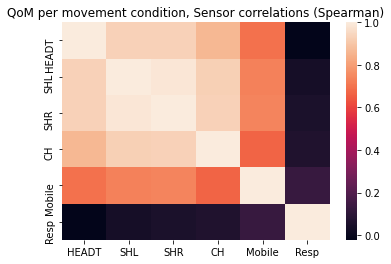

In [56]:
cs = df_QoM_all.columns
data2 = df_QoM_all[cs[1:7]]
corr = data2.corr(method="spearman")
sns.heatmap(corr)

plt.title('QoM per movement condition, Sensor correlations (Spearman)')
plt.savefig('QoM_Corr_Movements.png') 
corr

,HEADT,SHL,SHR,CH,Mobile,Resp
HEADT,1.000000,0.929719,0.928240,0.863041,0.710961,-0.022234
SHL,0.929719,1.000000,0.984710,0.927286,0.740347,0.035283
SHR,0.928240,0.984710,1.000000,0.931788,0.746445,0.051036
CH,0.863041,0.927286,0.931788,1.000000,0.671972,0.062463
Mobile,0.710961,0.740347,0.746445,0.671972,1.000000,0.098744
Resp,-0.022234,0.035283,0.051036,0.062463,0.098744,1.000000


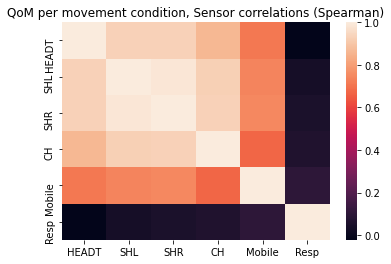

In [35]:
cs = df_QoM_all.columns
data2 = df_QoM_all[cs[1:7]]
corr = data2.corr(method="spearman")
sns.heatmap(corr)

plt.title('QoM per movement condition, Sensor correlations (Spearman)')
plt.savefig('QoM_Corr_Movements.png') 
corr

# now some analysis of factors
like position of mobile "Mobile Loc"

like Standing vs Sitting for Music Moves for Music 2 segment

Like classes of mobility for Audio and activeness. 

Eval classification per marker?

Ignore resp for now

In [57]:
# remove participant ID
df_QoM_all.loc[df_QoM_all['Participant'] == "DS",'Participant'] = '1'
df_QoM_all.loc[df_QoM_all['Participant'] == "KB",'Participant'] = '2'

In [58]:
# first consider just standing vs sitting in Music 2
# ID element 
df_sub = df_QoM_all.loc[df_QoM_all['Element'] == "Music 2"] # g.loc[g[8]== True,2]

df_sub2 = df_QoM_all.loc[df_QoM_all['Element'] == "Music 1"] # g.loc[g[8]== True,2]
df_sub2.loc[:,"Music Move"] = "Listen Seated"
df_sub  = df_sub .append(df_sub2, ignore_index=True)

df_sub2 = df_QoM_all.loc[df_QoM_all['Element'] == "Music 3"] # g.loc[g[8]== True,2]
df_sub2.loc[:,"Music Move"] = "Listen Seated"
df_sub  = df_sub .append(df_sub2, ignore_index=True)

df_sub2 = df_QoM_all.loc[df_QoM_all['Element'] == "Music 4"] # g.loc[g[8]== True,2]
df_sub2.loc[:,"Music Move"] = "Listen Seated"
df_sub  = df_sub .append(df_sub2, ignore_index=True)

df_sub2 = df_QoM_all.loc[df_QoM_all['Element'] == "Silence 1"] # g.loc[g[8]== True,2]
df_sub2.loc[:,"Music Move"] = "Lab Silence"
df_sub  = df_sub .append(df_sub2, ignore_index=True)

df_sub2 = df_QoM_all.loc[df_QoM_all['Element'] == "Silence 2"] # g.loc[g[8]== True,2]
df_sub2.loc[:,"Music Move"] = "Lab Silence"
df_sub  = df_sub .append(df_sub2, ignore_index=True)


# df_sub['Condition'] = 0
# df_sub2.loc[:,'Condition'] = "Seated S"

/Users/finn/.pyenv/versions/3.9.0/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [59]:
df_sub




,Element,HEADT,SHL,SHR,CH,Mobile,Resp,Participant,Trial stim,Mobile Loc,Move Act,Music Move,Trial order,Trial Name
0,Music 2,343.908296,306.524166,332.341657,895.405728,32.534405,49.039843,1,T1,6,Clapping,Move Standing,1,DS_T1
1,Music 2,45.513777,11.124544,12.385241,10.816888,1.808196,39.202746,1,T3,6,lean forward and back,Move Seated,2,DS_T3
2,Music 2,177.823062,29.036036,28.904247,24.724890,2.561343,41.964036,1,T5,6,Text,Move Seated,3,DS_T5
3,Music 2,137.998559,50.765418,50.668702,43.491593,5.306545,54.381782,1,T7,6,Stand stretch,Move Seated,4,DS_T7
4,Music 2,455.408461,411.618207,410.963574,807.210228,63.357889,100.940063,1,T2,12,lean forward and back,Move Standing,5,DS_T2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Silence 2,6.647065,4.411100,4.032215,4.384089,0.963639,106.869992,2,T6,6,Text,Lab Silence,12,KB_T6
92,Silence 2,11.080986,3.628948,3.679639,3.709460,1.203411,81.742741,2,T4,12,Remove phone,Lab Silence,13,KB_T4
93,Silence 2,4.809080,3.412478,3.263455,2.991521,1.034524,104.968696,2,T5,12,Text,Lab Silence,14,KB_T5
94,Silence 2,17.474271,6.214169,6.229912,5.645138,1.353048,34.879821,2,T7,12,Stand stretch,Lab Silence,15,KB_T7


In [60]:
df_sub['Music Move'].unique()

array(['Move Standing', 'Move Seated', 'Listen Seated', 'Lab Silence'],
      dtype=object)

In [61]:
markers = ['HEADT', 'SHL', 'SHR', 'CH', 'Mobile', 'Resp']
bfactors = ['Music Move']
for col in markers: 
    aov = pg.anova(dv=col, between=bfactors, data=df_sub )
    print('\n\n' + col + ' medians for factors: ' + str(bfactors))
    print(aov)



HEADT medians for factors: ['Music Move']
       Source  ddof1  ddof2         F         p-unc       np2
0  Music Move      3     92  80.39989  1.284598e-25  0.723889


SHL medians for factors: ['Music Move']
       Source  ddof1  ddof2           F         p-unc       np2
0  Music Move      3     92  172.054295  1.323969e-37  0.848725


SHR medians for factors: ['Music Move']
       Source  ddof1  ddof2           F         p-unc       np2
0  Music Move      3     92  175.973127  5.496527e-38  0.851594


CH medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     92  25.153087  5.678027e-12  0.450613


Mobile medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     92  29.039498  2.663266e-13  0.486374


Resp medians for factors: ['Music Move']
       Source  ddof1  ddof2         F     p-unc       np2
0  Music Move      3     92  2.241472  0.088685  0.06

In [40]:
markers = ['HEADT', 'SHL', 'SHR', 'CH', 'Mobile', 'Resp']
bfactors = ['Music Move']
for col in markers: 
    aov = pg.anova(dv=col, between=bfactors, data=df_sub )
    print('\n\n' + col + ' medians for factors: ' + str(bfactors))
    print(aov)



HEADT medians for factors: ['Music Move']
       Source  ddof1  ddof2         F         p-unc       np2
0  Music Move      3     92  80.39989  1.284598e-25  0.723889


SHL medians for factors: ['Music Move']
       Source  ddof1  ddof2           F         p-unc       np2
0  Music Move      3     92  172.054295  1.323969e-37  0.848725


SHR medians for factors: ['Music Move']
       Source  ddof1  ddof2           F         p-unc       np2
0  Music Move      3     92  175.973127  5.496527e-38  0.851594


CH medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     92  25.153087  5.678027e-12  0.450613


Mobile medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     92  29.125345  2.494746e-13  0.487111


Resp medians for factors: ['Music Move']
       Source  ddof1  ddof2         F     p-unc       np2
0  Music Move      3     92  2.241472  0.088685  0.06



HEADT medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  46.584363  1.040548e-13  0.760548


SHL medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  118.95125  3.954928e-21  0.890234


SHR medians for factors: ['Music Move']
       Source  ddof1  ddof2           F         p-unc       np2
0  Music Move      3     44  105.741282  3.880924e-20  0.878192


CH medians for factors: ['Music Move']
       Source  ddof1  ddof2          F     p-unc       np2
0  Music Move      3     44  10.799122  0.000019  0.424064


Mobile medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  30.971473  6.386429e-11  0.678631


Resp medians for factors: ['Music Move']
       Source  ddof1  ddof2       F     p-unc       np2
0  Music Move      3     44  1.0255  0.390548  0.065351


,HEADT,SHL,SHR,CH,Mobile,Resp
HEADT,1.000000,0.874512,0.875923,0.659466,0.785497,-0.264655
SHL,0.874512,1.000000,0.982957,0.776596,0.866044,0.013135
SHR,0.875923,0.982957,1.000000,0.780612,0.863765,-0.043530
CH,0.659466,0.776596,0.780612,1.000000,0.709401,0.094551
Mobile,0.785497,0.866044,0.863765,0.709401,1.000000,0.074142
Resp,-0.264655,0.013135,-0.043530,0.094551,0.074142,1.000000


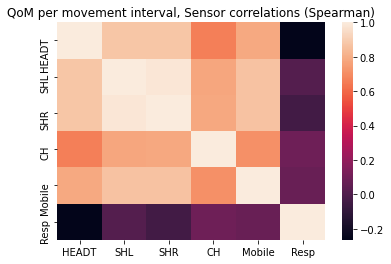

In [41]:
df_sub2 = df_sub.loc[df_sub['Mobile Loc'] == 6] 
#df_sub2 = df_sub.loc[df_sub['Participant'] == '2'] 
markers = ['HEADT', 'SHL', 'SHR', 'CH', 'Mobile', 'Resp']
bfactors = ['Music Move']
for col in markers: 
    aov = pg.anova(dv=col, between=bfactors, data=df_sub2 )
    print('\n\n' + col + ' medians for factors: ' + str(bfactors))
    print(aov)

cs = df_sub2.columns
data2 = df_sub2[cs[1:7]]
corr = data2.corr(method="spearman")
sns.heatmap(corr)

plt.title('QoM per movement interval, Sensor correlations (Spearman)')
plt.savefig('QoM_Corr_Loc_6.png') 
corr

In [ ]:
Mobile medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  30.970464  6.389505e-11  0.678624



HEADT medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  46.584363  1.040548e-13  0.760548


SHL medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  118.95125  3.954928e-21  0.890234


SHR medians for factors: ['Music Move']
       Source  ddof1  ddof2           F         p-unc       np2
0  Music Move      3     44  105.741282  3.880924e-20  0.878192


CH medians for factors: ['Music Move']
       Source  ddof1  ddof2          F     p-unc       np2
0  Music Move      3     44  10.799122  0.000019  0.424064


Mobile medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  30.941559  6.478278e-11  0.678421


Resp medians for factors: ['Music Move']
       Source  ddof1  ddof2       F     p-unc       np2
0  Music Move      3     44  1.0255  0.390548  0.065351


,HEADT,SHL,SHR,CH,Mobile,Resp
HEADT,1.000000,0.874512,0.875923,0.659466,0.697677,-0.264655
SHL,0.874512,1.000000,0.982957,0.776596,0.827833,0.013135
SHR,0.875923,0.982957,1.000000,0.780612,0.803951,-0.043530
CH,0.659466,0.776596,0.780612,1.000000,0.721450,0.094551
Mobile,0.697677,0.827833,0.803951,0.721450,1.000000,0.228615
Resp,-0.264655,0.013135,-0.043530,0.094551,0.228615,1.000000


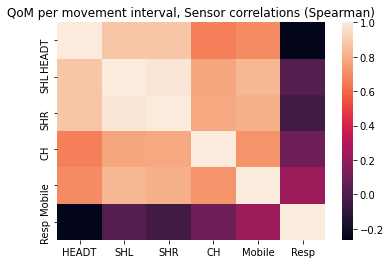

In [62]:
df_sub2 = df_sub.loc[df_sub['Mobile Loc'] == 6] 
#df_sub2 = df_sub.loc[df_sub['Participant'] == '2'] 
markers = ['HEADT', 'SHL', 'SHR', 'CH', 'Mobile', 'Resp']
bfactors = ['Music Move']
for col in markers: 
    aov = pg.anova(dv=col, between=bfactors, data=df_sub2 )
    print('\n\n' + col + ' medians for factors: ' + str(bfactors))
    print(aov)

cs = df_sub2.columns
data2 = df_sub2[cs[1:7]]
corr = data2.corr(method="spearman")
sns.heatmap(corr)

plt.title('QoM per movement interval, Sensor correlations (Spearman)')
plt.savefig('QoM_Corr_Loc_6.png') 
corr

In [24]:
corr.iloc[:4].mean()

HEADT     0.852475
SHL       0.908516
SHR       0.909873
CH        0.804168
Mobile    0.806177
Resp     -0.050125
dtype: float64



HEADT medians for factors: ['Music Move']
       Source  ddof1  ddof2         F         p-unc       np2
0  Music Move      3     44  38.93064  1.919528e-12  0.726354


SHL medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  70.502873  7.671990e-17  0.827794


SHR medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  76.570621  1.699028e-17  0.839247


CH medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc      np2
0  Music Move      3     44  14.748467  8.727477e-07  0.50139


Mobile medians for factors: ['Music Move']
       Source  ddof1  ddof2          F     p-unc       np2
0  Music Move      3     44  13.454012  0.000002  0.478438


Resp medians for factors: ['Music Move']
       Source  ddof1  ddof2         F     p-unc       np2
0  Music Move      3     44  1.627291  0.196686  0.099871


,HEADT,SHL,SHR,CH,Mobile,Resp
HEADT,1.000000,0.926075,0.931937,0.930525,0.752714,0.006730
SHL,0.926075,1.000000,0.979375,0.975901,0.788754,0.060899
SHR,0.931937,0.979375,1.000000,0.977312,0.752280,0.032241
CH,0.930525,0.975901,0.977312,1.000000,0.721125,-0.053300
Mobile,0.752714,0.788754,0.752280,0.721125,1.000000,0.205818
Resp,0.006730,0.060899,0.032241,-0.053300,0.205818,1.000000


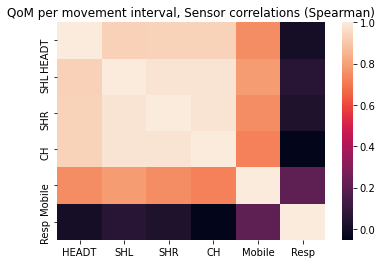

In [25]:
df_sub2 = df_sub.loc[df_sub['Mobile Loc'] == 12] 
#df_sub2 = df_sub.loc[df_sub['Participant'] == '2'] 
markers = ['HEADT', 'SHL', 'SHR', 'CH', 'Mobile', 'Resp']
bfactors = ['Music Move']
for col in markers: 
    aov = pg.anova(dv=col, between=bfactors, data=df_sub2 )
    print('\n\n' + col + ' medians for factors: ' + str(bfactors))
    print(aov)

cs = df_sub2.columns
data2 = df_sub2[cs[1:7]]
corr = data2.corr(method="spearman")
sns.heatmap(corr)

plt.title('QoM per movement interval, Sensor correlations (Spearman)')
plt.savefig('QoM_Corr_Loc_12.png') 
corr

In [26]:
corr.iloc[:4].mean()

HEADT     0.947134
SHL       0.970338
SHR       0.972156
CH        0.970935
Mobile    0.753718
Resp      0.011642
dtype: float64

In [51]:
df_sub2.loc[df_sub2['Trial stim'] == 'T2']

,Element,HEADT,SHL,SHR,CH,Mobile,Resp,Participant,Trial stim,Mobile Loc,Move Act,Music Move,Trial order,Trial Name
9,Music 2,246.856361,296.524110,283.682781,210.774950,24.510054,115.043832,2,T2,6,lean forward and back,Move Standing,10,KB_T2
25,Music 1,4.641364,3.415773,3.295918,3.726598,0.770103,108.927189,2,T2,6,lean forward and back,Listen Seated,10,KB_T2
41,Music 3,29.749598,12.527040,12.345973,86.400485,1.702662,94.227099,2,T2,6,lean forward and back,Listen Seated,10,KB_T2
57,Music 4,6.351596,4.626421,4.749069,80.569115,0.826084,115.020454,2,T2,6,lean forward and back,Listen Seated,10,KB_T2
73,Silence 1,6.970415,4.755209,4.490893,4.541966,0.859118,135.601353,2,T2,6,lean forward and back,Lab Silence,10,KB_T2
89,Silence 2,7.564328,5.116203,5.169228,5.713257,0.877285,42.608844,2,T2,6,lean forward and back,Lab Silence,10,KB_T2


In [52]:
df_sub2 = df_sub.loc[df_sub['Mobile Loc'] == 12] 
markers = ['HEADT', 'SHL', 'SHR', 'CH', 'Mobile', 'Resp']
bfactors = ['Music Move']
for col in markers: 
    aov = pg.anova(dv=col, between=bfactors, data=df_sub2 )
    print('\n\n' + col + ' medians for factors: ' + str(bfactors))
    print(aov)



HEADT medians for factors: ['Music Move']
       Source  ddof1  ddof2         F         p-unc       np2
0  Music Move      3     44  38.93064  1.919528e-12  0.726354


SHL medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  70.502873  7.671990e-17  0.827794


SHR medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc       np2
0  Music Move      3     44  76.570621  1.699028e-17  0.839247


CH medians for factors: ['Music Move']
       Source  ddof1  ddof2          F         p-unc      np2
0  Music Move      3     44  14.748467  8.727477e-07  0.50139


Mobile medians for factors: ['Music Move']
       Source  ddof1  ddof2          F     p-unc       np2
0  Music Move      3     44  13.454014  0.000002  0.478438


Resp medians for factors: ['Music Move']
       Source  ddof1  ddof2         F     p-unc       np2
0  Music Move      3     44  1.627291  0.196686  0.099871


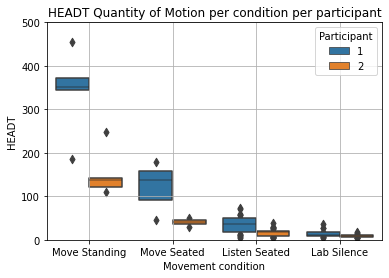

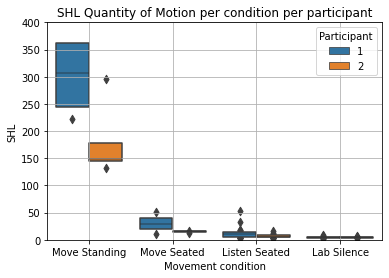

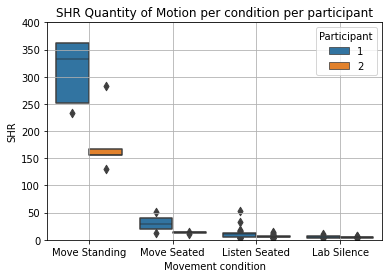

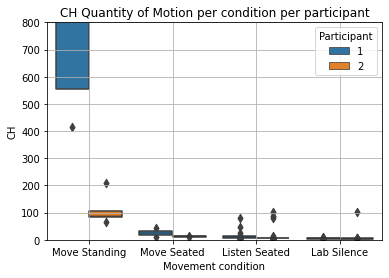

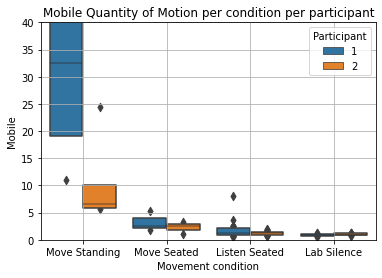

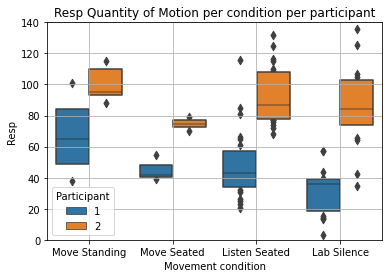

In [30]:
os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/Mobile_test/')

markers = ['HEADT', 'SHL', 'SHR', 'CH', 'Mobile', 'Resp']
bfactors = ['Music Move']
hueCon ='Participant' 
marker_ranges={'HEADT':500, 'SHL':400, 'SHR':400, 'CH':800, 'Mobile':40, 'Resp':140}
for col in markers:
    ax = sns.boxenplot(y=col, x="Music Move",hue=hueCon, data=df_sub)
    plt.ylim(0,marker_ranges[col])
    plt.grid()
#    plt.yticks([])
    plt.xlabel('Movement condition')
    plt.title(col + ' Quantity of Motion per condition per participant')
#     df_sub.boxplot(column=col, by=['Music Move'])

    plt.savefig('Marker_MoveCon_' + hueCon + '_' + col + '.png') 

    plt.show()
    #     In_Feat_Col.plot.hist(alpha=0.5,bins=50,figsize=(10,2.5)) 

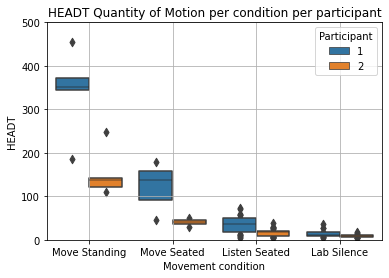

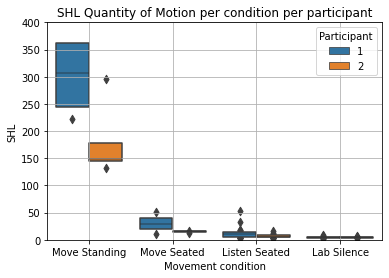

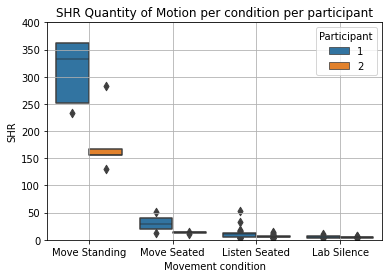

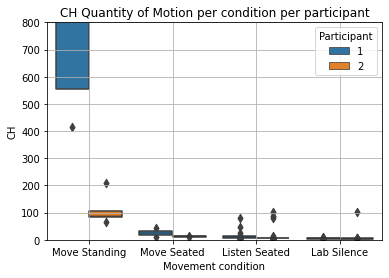

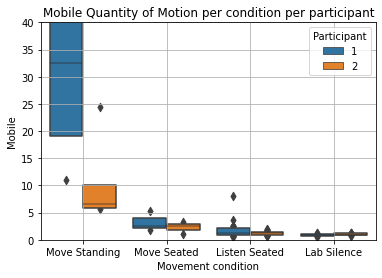

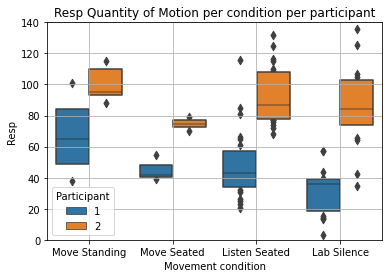

In [53]:
os.chdir('/Users/finn/Desktop/Current_Projects/Resp_Mobile_recording/Mobile_test/')

markers = ['HEADT', 'SHL', 'SHR', 'CH', 'Mobile', 'Resp']
bfactors = ['Music Move']
hueCon ='Participant' 
marker_ranges={'HEADT':500, 'SHL':400, 'SHR':400, 'CH':800, 'Mobile':40, 'Resp':140}
for col in markers:
    ax = sns.boxenplot(y=col, x="Music Move",hue=hueCon, data=df_sub)
    plt.ylim(0,marker_ranges[col])
    plt.grid()
#    plt.yticks([])
    plt.xlabel('Movement condition')
    plt.title(col + ' Quantity of Motion per condition per participant')
#     df_sub.boxplot(column=col, by=['Music Move'])

    plt.savefig('Marker_MoveCon_' + hueCon + '_' + col + '.png') 

    plt.show()
    #     In_Feat_Col.plot.hist(alpha=0.5,bins=50,figsize=(10,2.5)) 

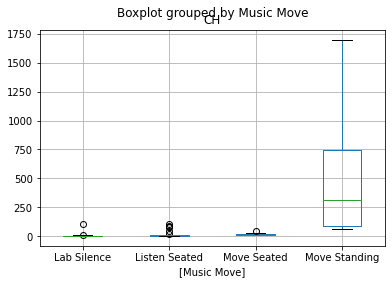

In [110]:
boxplot = df_sub.boxplot(column=['CH'], by=['Music Move'])

(0.0, 200.0)

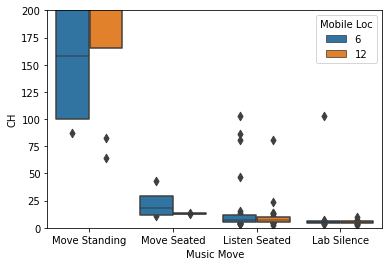

In [111]:
ax = sns.boxenplot(y="CH", x="Music Move",hue="Mobile Loc", data=df_sub)
plt.ylim(0,200)

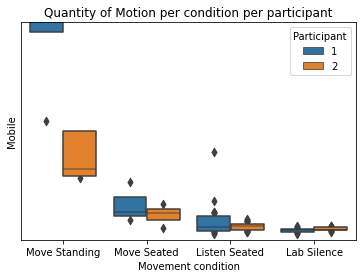

In [31]:
ax = sns.boxenplot(y="Mobile", x="Music Move",hue='Participant', data=df_sub)
plt.ylim(0,20)
plt.yticks([])
plt.xlabel('Movement condition')
plt.title('Quantity of Motion per condition per participant')
plt.savefig('Marker_MoveCon_conditions_Mobile_tight.png') 

plt.show()

(0.0, 400.0)

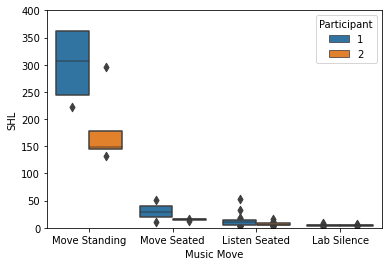

In [116]:
ax = sns.boxenplot(y="SHL", x="Music Move",hue='Participant', data=df_sub)
plt.ylim(0,400)